# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import neighbors
from sklearn import preprocessing
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# reading the data

In [2]:
# Creating a list of attributes
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
# Adding the attributes as an argument for pandas to export into the data frame
df = pd.read_csv("magic04.data", names = cols)
df.head() # Displays the first five rows of data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
print(len(df))

19020


In [4]:
df["class"].unique() # g stands for gamma and h stands for hadrons

array(['g', 'h'], dtype=object)

In [5]:
df["class"] = (df["class"] == "g").astype(int)

In [6]:
df

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,0
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,0
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,0
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,0


In [116]:
# Showing a histogram of all hadrons and gammas in every class in the dataset
# for label in cols[:-1]:
#     plt.hist(df[df["class"] == 1][label], color = "blue", label = "gamma", alpha = 0.7, density = True)
#     plt.hist(df[df["class"] == 0][label], color = "green", label = "hadron", alpha = 0.7, density = True)
#     plt.title(label)
#     plt.ylabel("probablility")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()


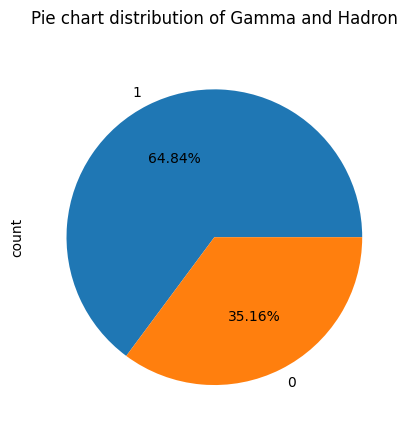

In [13]:
labels = ["Gamma", "Hedron"]
df["class"].value_counts().plot(kind = "pie", autopct = "%1.2f%%")
plt.title("Pie chart distribution of Gamma and Hadron\n")
plt.show()

# Train, test dataset


In [19]:
# Splitting our data set into 70% train 30% testing
train, test = np.split(df.sample(frac = 1), [int(0.8 * len(df))])
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.3, random_state = 42)

# Sampling our data

In [20]:
def scale_dataset(dataframe, oversample = False):
    x = dataframe[dataframe.columns[:-1]].values   # feature matrix
    y = dataframe[dataframe.columns[-1]].values    # target vector

    scaler = StandardScaler()
    X = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
        
    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [21]:
# Checking to see if we have equal samples of gamma and hadrons in our dataset
print(len(train[train["class"] == 1]))  # Gamma
print(len(train[train["class"] == 0]))  # Hadron

9899
5317


In [22]:
print(len(test[test["class"] == 1]))
print(len(test[test["class"] == 0]))

2433
1371


In [23]:
train, x_train, y_train = scale_dataset(train, oversample = True)
test, x_test, y_test = scale_dataset(test, oversample = False) # We're not oversampling test dataset so 
# that the model can work efficiently with data that hasn't been seen before


In [24]:
len(x_train)

19798

In [25]:
len(y_train)

19798

In [26]:
len(x_test)

3804

In [27]:
len(y_test)

3804

# KNN


In [126]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 

In [127]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_moedl = knn_model.fit(x_train, y_train)

In [128]:
y_pred = knn_model.predict(x_test)

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.58      0.65      4664
           1       0.80      0.90      0.84      8650

    accuracy                           0.78     13314
   macro avg       0.77      0.74      0.75     13314
weighted avg       0.78      0.78      0.78     13314



In [130]:
# Calculate accuracy score
knn_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {knn_model_accuracy_score * 100: .2f}%\n")

# Calculate F1 score
knn_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score: {knn_model_f1_score * 100: .2f}%\n")

# Calculate recall score
knn_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall: {knn_model_recall_score * 100: .2f}%\n")

# Calculate precision score
knn_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision: {knn_model_precision_score* 100: .2f}%")

Accuracy:  78.41%

F1 Score:  84.34%

Recall:  89.50%

Precision:  79.74%


# SVM


In [131]:
from sklearn.svm import SVC

In [132]:
svm_model = SVC() 
svm_model = svm_model.fit(x_train, y_train)

In [133]:
y_pred = svm_model.predict(x_test)

In [134]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.55      0.68      4664
           1       0.80      0.96      0.87      8650

    accuracy                           0.82     13314
   macro avg       0.84      0.76      0.77     13314
weighted avg       0.83      0.82      0.80     13314



In [135]:
# Calculate accuracy score
svm_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {svm_model_accuracy_score * 100: .2f}\n")

# Calculate F1 score
svm_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score: {svm_model_f1_score * 100: .2f}%\n" )

# Calculate recall score
svm_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall: {svm_model_recall_score * 100: .2f}%\n")

# Calculate precision score
svm_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision: {svm_model_precision_score * 100: .2f}%")

Accuracy:  81.67

F1 Score:  87.20%

Recall:  96.10%

Precision:  79.81%


# Logistic Regression

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

c:\Users\Elitebook\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
y_pred = lg_model.predict(x_test)

In [139]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.59      0.66      4664
           1       0.80      0.90      0.85      8650

    accuracy                           0.79     13314
   macro avg       0.78      0.75      0.76     13314
weighted avg       0.79      0.79      0.78     13314



In [140]:
# Calculate accuracy score
lg_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {lg_model_accuracy_score * 100: .2f}%\n")

# Calculate F1 score
lg_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score: {lg_model_f1_score * 100: .2f}%\n")

# Calculate recall score
lg_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall: {lg_model_recall_score * 100: .2f}%\n")

# Calculate precision score
lg_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision: {lg_model_precision_score * 100: .2f}%")

Accuracy:  79.24%

F1 Score:  84.97%

Recall:  90.32%

Precision:  80.22%


# Random Forest

In [141]:
from sklearn.ensemble import RandomForestClassifier

In [142]:
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(x_train, y_train)

In [143]:
y_pred = rf_model.predict(x_test)

In [144]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      4664
           1       0.88      0.94      0.91      8650

    accuracy                           0.87     13314
   macro avg       0.87      0.85      0.86     13314
weighted avg       0.87      0.87      0.87     13314



In [145]:
# Calculate accuracy score
rf_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_model_accuracy_score * 100: .2f}%\n")

# Calculate F1 score
rf_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score: {rf_model_f1_score * 100: .2f}%\n")

# Calculate recall score
rf_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall: {rf_model_recall_score * 100: .2f}%\n")

# Calculate precision score
rf_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision: {rf_model_precision_score * 100: .2f}%")

Accuracy:  87.36%

F1 Score:  90.60%

Recall:  93.75%

Precision:  87.66%


# Decision Tree


In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
dt_model = DecisionTreeClassifier()
dt_model = dt_model.fit(x_train, y_train)

In [148]:
y_pred = dt_model.predict(x_test)

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      4664
           1       0.85      0.86      0.86      8650

    accuracy                           0.81     13314
   macro avg       0.80      0.79      0.79     13314
weighted avg       0.81      0.81      0.81     13314



In [150]:
dt_model_accuracy_score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rf_model_precision_score * 100: .2f}%\n")

# Calculate F1 score
dt_model_f1_score = f1_score(y_test, y_pred)
print(f"F1 Score: {dt_model_f1_score * 100: .2f}%\n")

# Calculate recall score
dt_model_recall_score = recall_score(y_test, y_pred)
print(f"Recall: {dt_model_recall_score * 100: .2f}%\n")

# Calculate precision score
dt_model_precision_score = precision_score(y_test, y_pred)
print(f"Precision: {dt_model_precision_score * 100: .2f}%")

Accuracy:  87.66%

F1 Score:  85.73%

Recall:  86.47%

Precision:  85.00%
